# Multiple Linear Regression (Advertising)

KETERANGAN KOLOM:
1. Unnamed = Tidak Diperlukan
2. TV = Iklan Televisi
3. Radio = Iklan Radio
4. Newspaper = Iklan Koran/Newspaper
5. Sales = Penjualan

## A. Data Preparation

### A.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### A.2 Load Data

In [2]:
try:
    df = pd.read_csv('Advertising.csv')
    print("Berhasil Membaca Data")
except Exception as e:
    print("Gagal Membaca Data")


Berhasil Membaca Data


In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### A.3 Cek Dimensi Data

In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### A.4 Drop Kolom Yang Tidak Relevan

In [6]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### A.5 Nilai Duplikasi

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
#TIDAK ADA DUPLIKAT :)

### A.6 Nilai Hilang

In [10]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
#TIDAK ADA NILAI HILANG :)

## B. Exploratory Data Analysis

### B.1 Cek Outliers

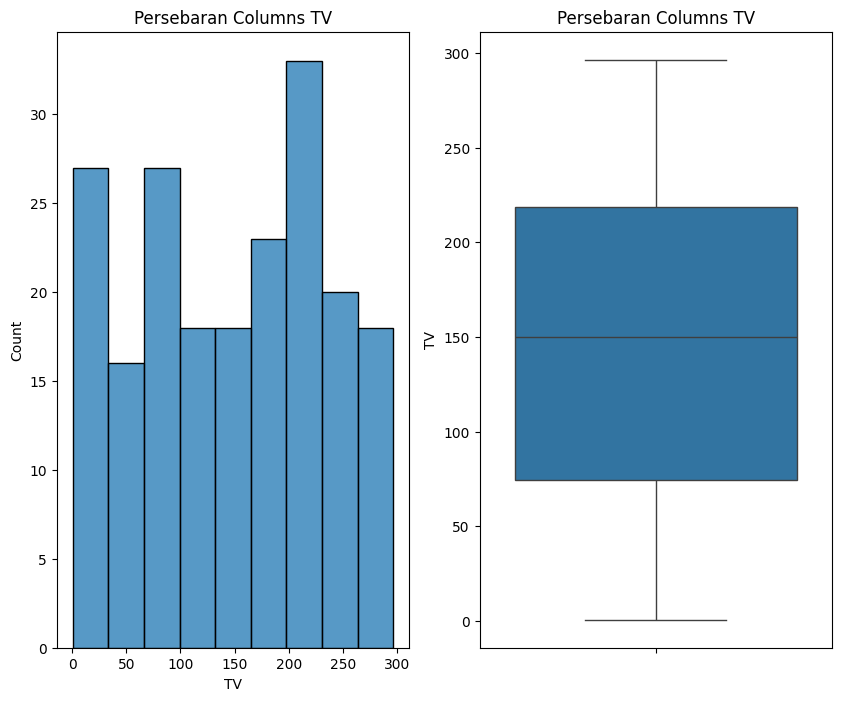

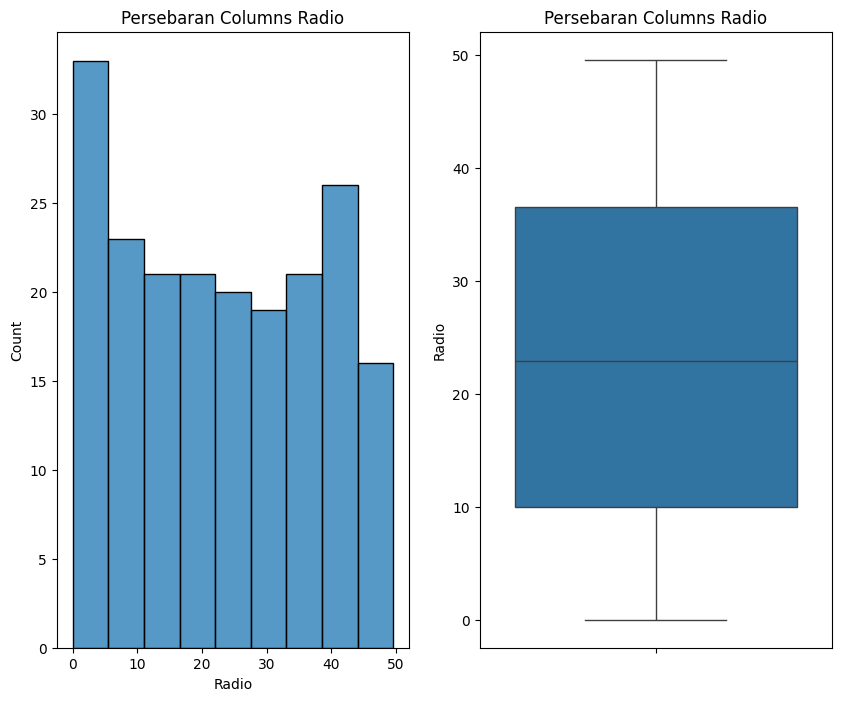

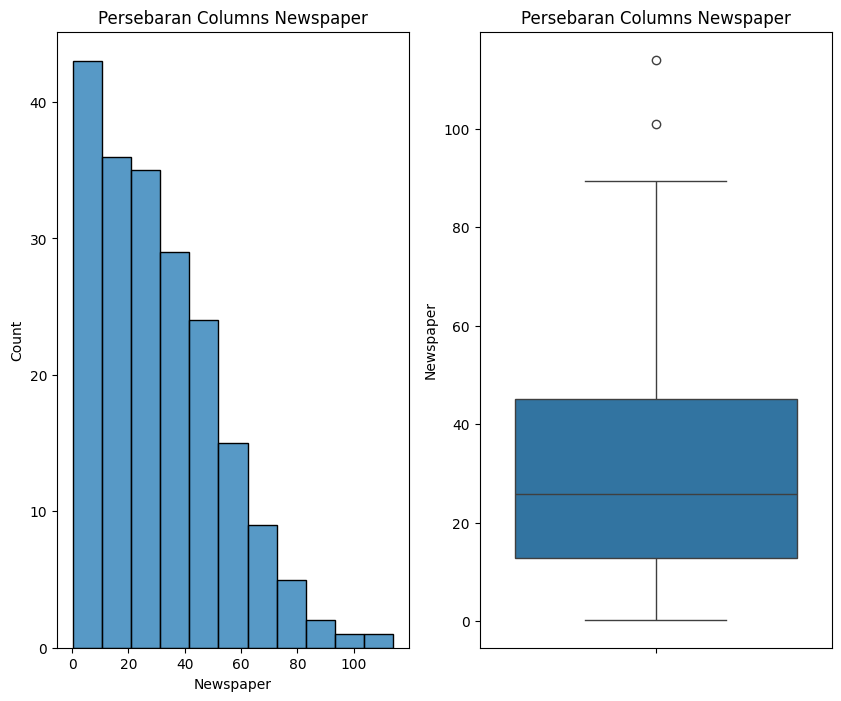

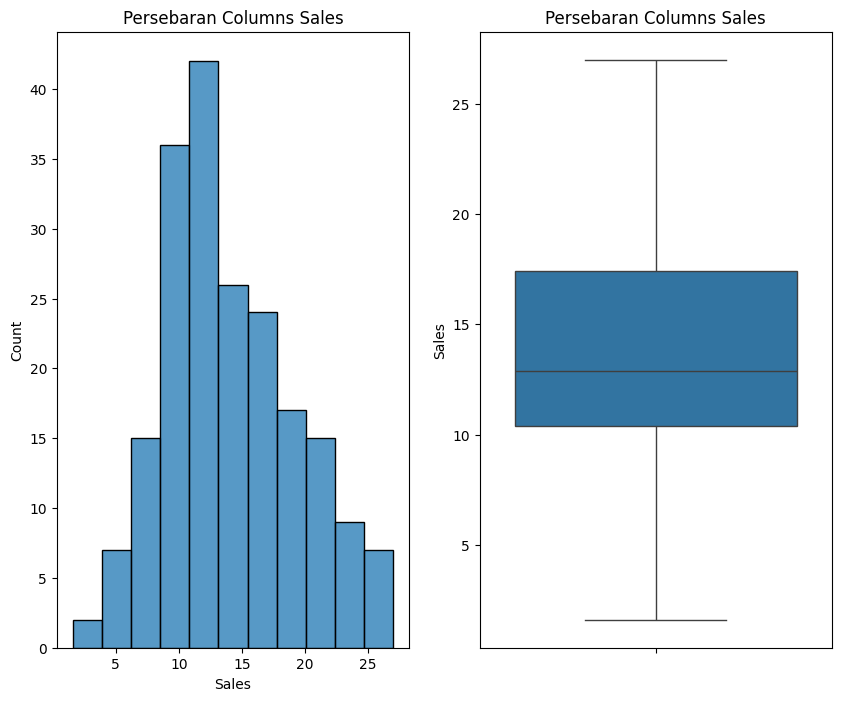

In [12]:
for col in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(10, 8))
    sns.histplot(df[col], ax = axes[0])
    axes[0].set_title(f"Persebaran Columns {col}")
    
    sns.boxplot(df[col], ax = axes[1])
    axes[1].set_title(f"Persebaran Columns {col}")
    
plt.show()

In [13]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [14]:
clean = df.copy

In [15]:
q1 = df['Newspaper'].quantile(0.25)
q3 = df['Newspaper'].quantile(0.75)

q1, q3

(np.float64(12.75), np.float64(45.1))

In [16]:
iqr = q3 - q1

iqr

np.float64(32.35)

In [17]:
lb = q1 - 1.5 * iqr.round()
ub = q3 + 1.5 * iqr.round()

lb, ub

(np.float64(-35.25), np.float64(93.1))

In [18]:
outlier = df[(df['Newspaper'] < lb) | (df['Newspaper'] > ub)]
outlier

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [19]:
clean = df[(df['Newspaper'] > lb) & (df['Newspaper'] < ub)]
clean

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


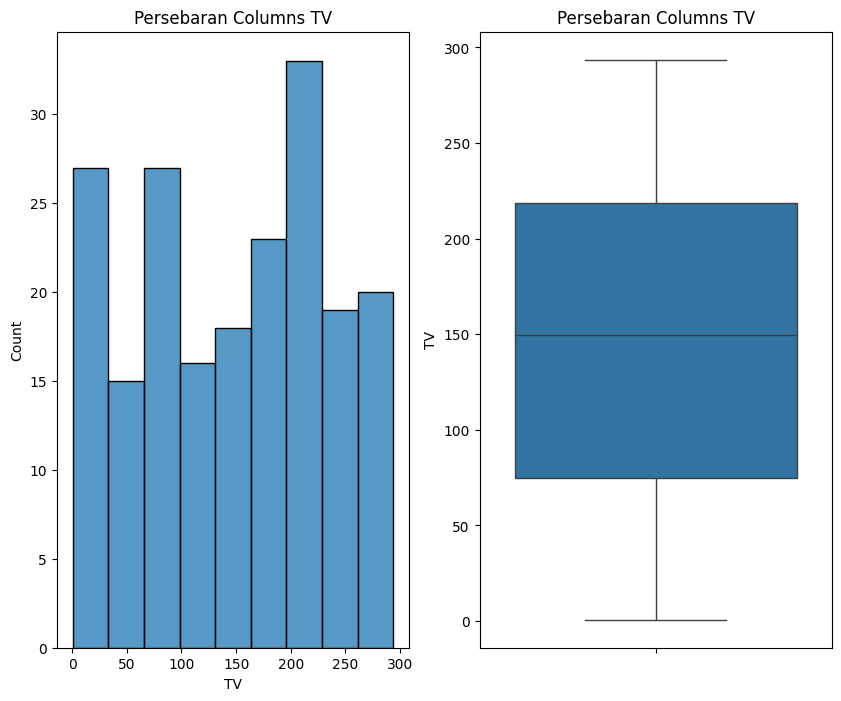

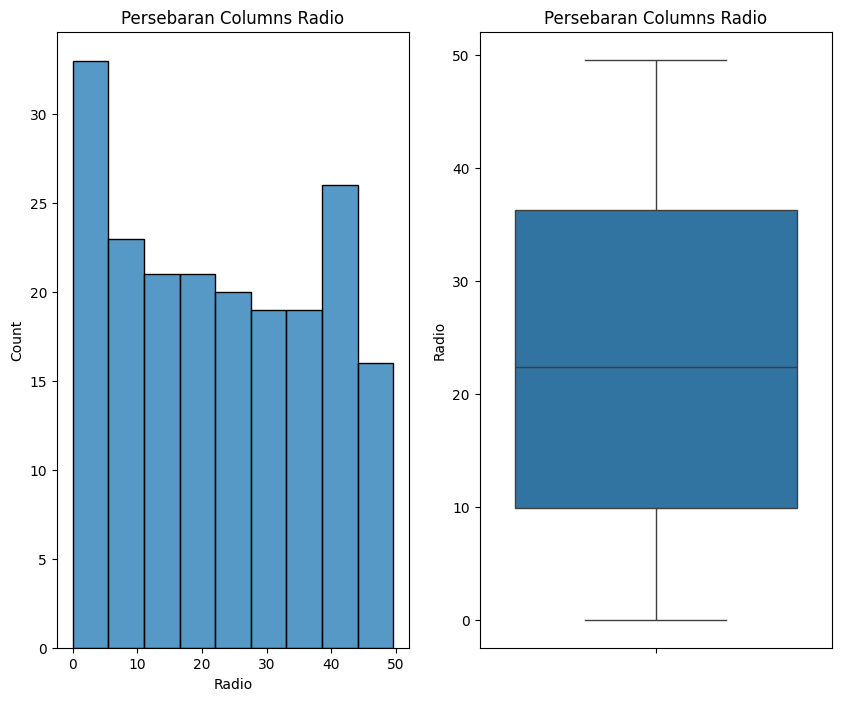

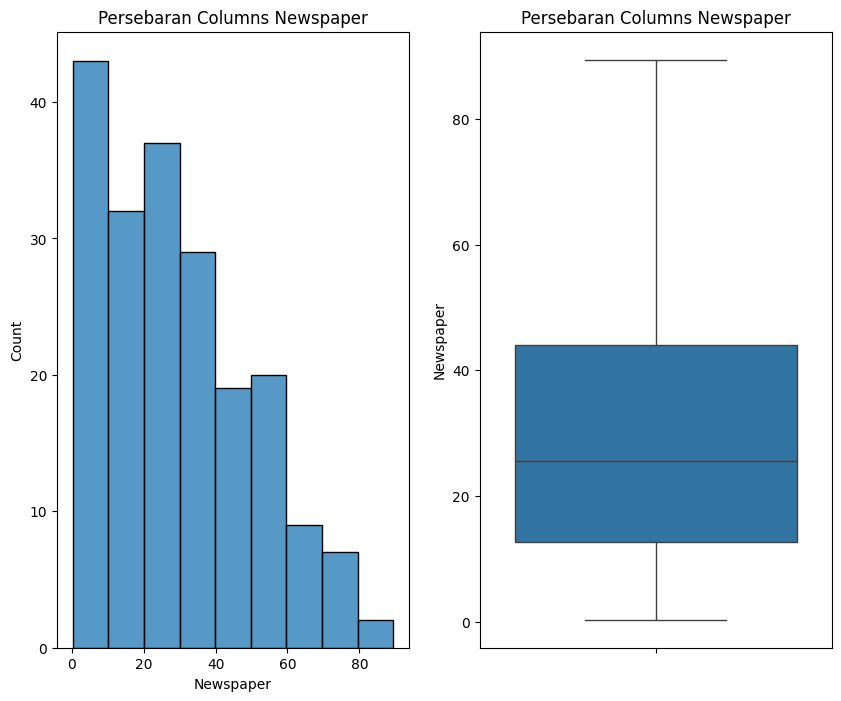

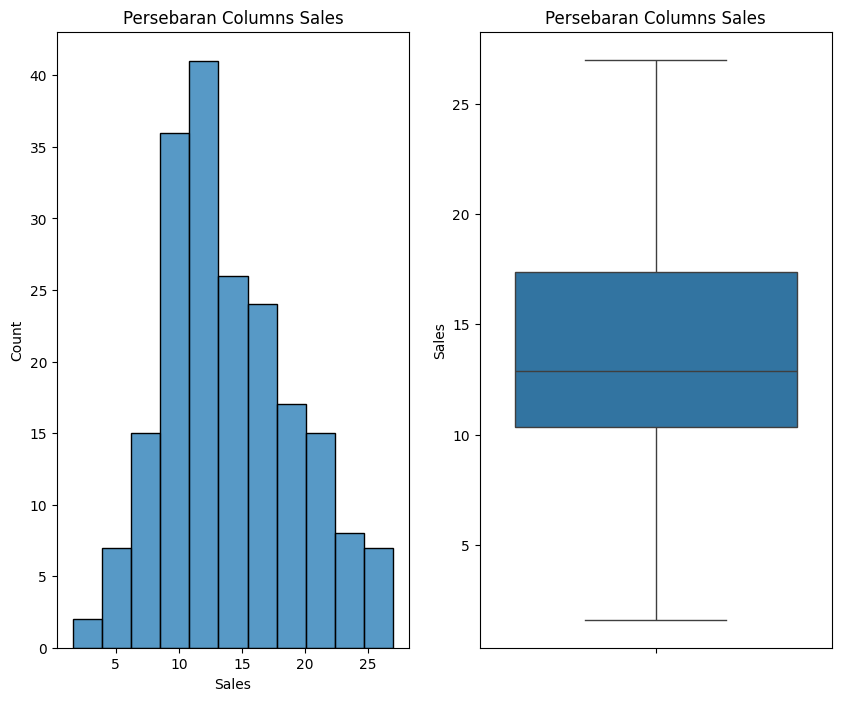

In [20]:
for col in clean.columns:
    fig, axes = plt.subplots(1, 2, figsize=(10, 8))
    sns.histplot(clean[col], ax = axes[0])
    axes[0].set_title(f"Persebaran Columns {col}")
    
    sns.boxplot(clean[col], ax = axes[1])
    axes[1].set_title(f"Persebaran Columns {col}")
    
plt.show()

### B.2 Visualisasi Pairplot

<Figure size 1000x800 with 0 Axes>

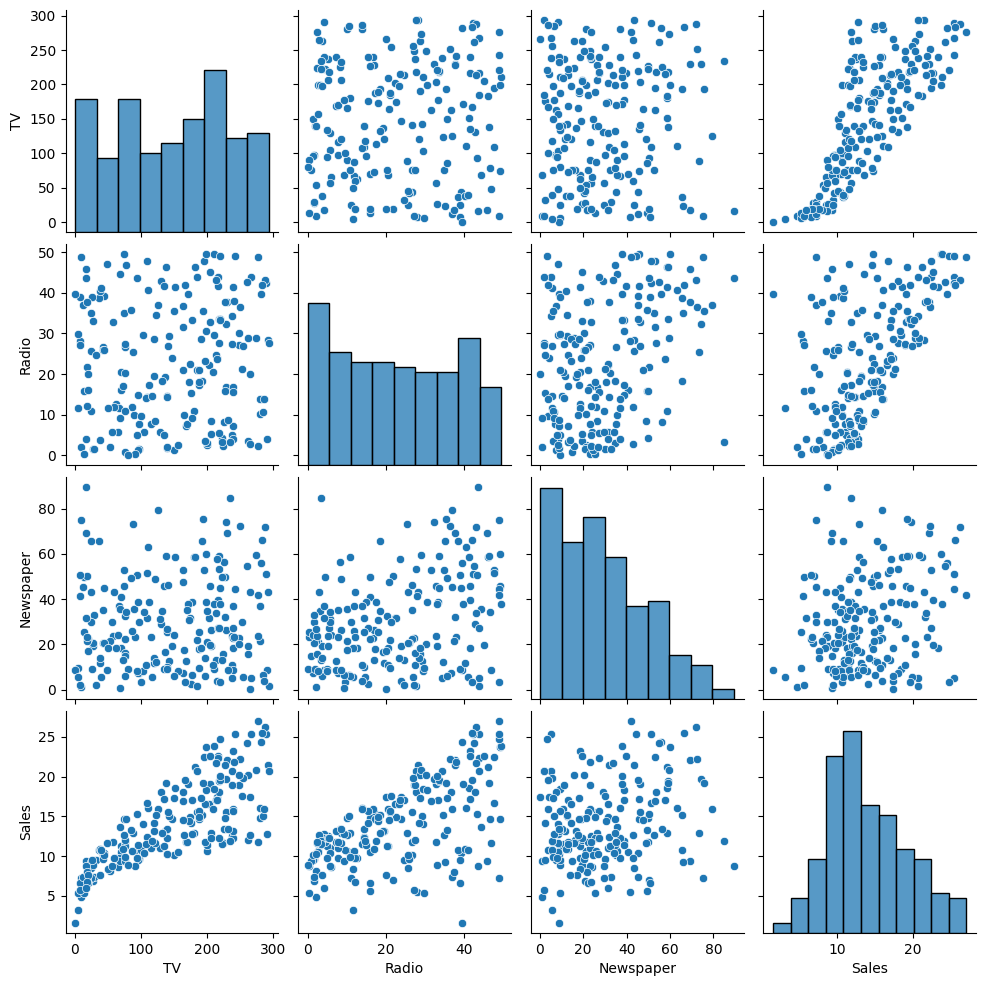

In [21]:
plt.figure(figsize=(10, 8))
sns.pairplot(clean)

### B.3 Visualisasi Korelasi

<Axes: >

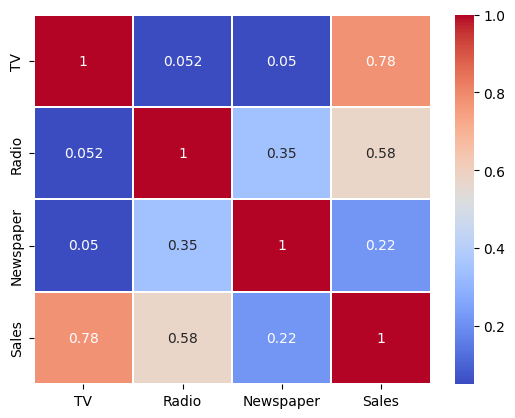

In [22]:
sns.heatmap(clean.corr(), annot=True, cmap='coolwarm', linewidths=1.1)

## C. Pemodelan Data

### Rumus Inti (The Golden Formula)

Ini adalah metode **Normal Equation** untuk mencari garis regresi terbaik secara instan menggunakan Aljabar Linear (Matriks).

$$\theta = (X^T X)^{-1} X^T y$$

**Keterangan Simbol:**
* $\theta$ (**Theta**): Hasil akhir yang kita cari (Weights). Berisi koefisien (Slope/$m$) dan bias (Intercept/$c$).
* $X$ (**Features**): Data fitur/input. **Wajib** ditambah kolom angka `1` di depannya (sebagai bias).
* $y$ (**Target**): Data target (output/jawaban).
* $^T$ (**Transpose**): Operasi memutar matriks (baris menjadi kolom).
* $^{-1}$ (**Inverse**): Kebalikan matriks (analoginya seperti pembagian dalam angka biasa).

---
**Implementasi dalam Numpy:**
```python
# Asumsi X_matrix sudah memiliki kolom bias (angka 1)
theta = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ y_data

### C.1 Persiapan Data Untuk Matriks

In [23]:
clean.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [24]:
X_data = clean[['TV', 'Radio', 'Newspaper']].values
y_data = clean[['Sales']].values

### C.2 Modifikasi Matriks (Tambah Bias)

In [25]:
# Kita perlu menambahkan angka '1' di depan setiap data X
# Agar rumus matriks bisa menghitung Intercept (Titik potong sumbu Y)
ones = np.ones((len(X_data), 1))
X_matrix = np.concatenate((ones, X_data), axis=1)

In [26]:
# 1. Acak urutan data (Shuffling)
np.random.seed(42) # Biar hasilnya acak konsisten
indices = np.random.permutation(len(X_matrix))

# 2. Tentukan ukuran data test, disini kami ambil 20%
test_size = int(len(X_matrix) * 0.2)

# 3. Pisahkan Index
test_idx = indices[:test_size] #untuk tes 20%
train_idx = indices[test_size:] #untuk train sisanya yaitu 80%

# 4. Buat Variabel Train & Test
X_train, X_test = X_matrix[train_idx], X_matrix[test_idx]
y_train, y_test = y_data[train_idx], y_data[test_idx]

### C.4 Rumus Matriks Theta (The Normal Equation)

In [27]:
# 1. Hitung Theta dengan data train
# Kita cari rumus garis cuma pakai data latihan
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# 2. Hitung prediksi
# Kita tes modelnya suruh ngerjain soal
y_pred_test = X_test @ theta

In [35]:
np.save('model_advertising.npy', theta)
print("Model berhasil disimpan untuk GUI")

Model berhasil disimpan untuk GUI


### C.5 Ambil Hasil Modelling

In [28]:
features = ['TV', 'Radio', 'Newspaper']
intercept = theta[0][0] # Nilai C

print("--- KESIMPULAN MODEL ---")
print(f"Intercept (Base Sales): {intercept:.2f}")

for i, nama_fitur in enumerate(features):
    slope = theta[i+1][0] # Nilai M (TV, Radio, Newspaper)
    
    print(f"Koefisien {nama_fitur}: {slope:.4f}")
    # Tiap nambah 1 unit iklan di fitur ini, Sales naik sebesar slope

# Rumus Sales
print(f"\nRumus: Sales = {intercept:.2f} + ({theta[1][0]:.2f} * TV) + ({theta[2][0]:.2f} * Radio) + ({theta[3][0]:.2f} * News)")

--- KESIMPULAN MODEL ---
Intercept (Base Sales): 2.98
Koefisien TV: 0.0452
Koefisien Radio: 0.1824
Koefisien Newspaper: 0.0049

Rumus: Sales = 2.98 + (0.05 * TV) + (0.18 * Radio) + (0.00 * News)


### C.6 Visualisasi Hasil Regresi

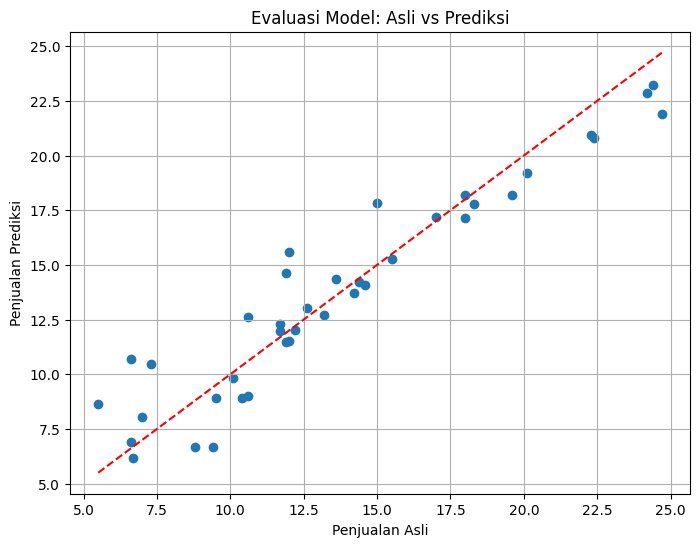

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel('Penjualan Asli')
plt.ylabel('Penjualan Prediksi')
plt.title('Evaluasi Model: Asli vs Prediksi')
plt.grid(True)
plt.show()

## D. Evaluasi Model

### D.1 Hitung MSE (Mean Squared Error)
Rata-rata kesalahan kuadrat (selisih riil dalam satuan kuadrat).
- Nilai Bagus: Semakin mendekati 0 semakin bagus.

In [30]:
error = y_test - y_pred_test
mse = np.mean(error ** 2)
mse

np.float64(2.8051728639023032)

### D.2 Hitung MAE (Mean Absolute Error)
Rata-rata kesalahan mutlak (selisih riil dalam satuan asli).
- Nilai Bagus: Semakin mendekati 0 semakin bagus.

In [31]:
mae = np.mean(np.abs(error))
mae

np.float64(1.271259523280837)

### D.3 Hitung RMSE (Root Mean Squared Error)
Rata-rata kesalahan kuadrat diakar (selisih riil dalam satuan kuadrat).
- Nilai Bagus: Semakin mendekati 0 semakin bagus.

In [32]:
rmse = np.sqrt(mse)
rmse

np.float64(1.674865028562691)

### D.4 Hitung R-Squared (Akurasi)
Seberapa pintar model menjelaskan pola data (dalam persen).
- Nilai Bagus: Semakin mendekati 1 (100%) semakin bagus.

In [33]:
# Rumus: 1 - (Error Model Kita / Error Rata-rata Polos)
ss_residual = np.sum(error ** 2)
ss_total = np.sum((y_data - np.mean(y_data)) ** 2)
r2_score = 1 - (ss_residual / ss_total)
r2_score

np.float64(0.9794314599580987)

### D.5 Hitung Adjusted R-Squared (Akurasi)
Seberapa pintar model menjelaskan pola data (dalam persen).
- Nilai Bagus: Semakin mendekati 1 (100%) semakin bagus.

In [34]:
adj_r2_score = 1 - (((1 - r2_score)(y_test - 1)) / y_test - 3 - 1)
adj_r2_score

TypeError: 'numpy.float64' object is not callable

### D.6 Perbandingan Latihan dengan Ujian (Mencegah Overfitting)

In [ ]:
#Hitung Akurasi Latihan (Train Set)
y_pred_train = X_train @ theta

error_train = y_train - y_pred_train
ss_res_train = np.sum(error_train ** 2)
ss_tot_train = np.sum((y_train - np.mean(y_train)) ** 2)
r2_train = 1 - (ss_res_train / ss_tot_train)

#Hitung Akurasi Ujian (Test Set)
error_test = y_test - y_pred_test
ss_res_test = np.sum(error_test ** 2)
ss_tot_test = np.sum((y_test - np.mean(y_test)) ** 2)
r2_test = 1 - (ss_res_test / ss_tot_test)

#Perbandingan
print(f"R2 Score Training : {r2_train:.5f}")
print(f"R2 Score Testing  : {r2_test:.5f}")
print(f"Selisih (Gap)     : {abs(r2_train - r2_test):.5f}")

#Analisa=
if abs(r2_train - r2_test) > 0.10: # Kalau bedanya lebih dari 10%
    print("\nOverfitting")
else:
    print("\nGood Fit")

R2 Score Training : 0.89373
R2 Score Testing  : 0.89840
Selisih (Gap)     : 0.00467

Good Fit
